In [ ]:
!pip install wordcloud

These lines import the necessary libraries for data manipulation, analysis, and visualization. `pandas` is used for data structures and operations, `numpy` for numerical operations, `seaborn` and `matplotlib.pyplot` for plotting, and `WordCloud` for generating word clouds. We also set the plotting style and ignore warnings for cleaner output.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sns.set_style('darkgrid')


import warnings
warnings.filterwarnings('ignore')

Here, we load the Netflix titles dataset from the specified CSV file into a pandas DataFrame named `df` and display the first few rows to inspect the data.

In [ ]:
df = pd.read_csv(r"/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
## Data cleaning

This code checks for missing values in each column of the DataFrame and sums them up to show the total number of null values per column.

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


Here, we fill the missing values in the 'director' and 'cast' columns with the string "Unknown". This is a common practice when missing values can be interpreted as the absence of a director or cast member.

In [ ]:
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")

This cell checks for missing values again after filling the 'director' and 'cast' columns to confirm the changes.

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


This cell displays the first three rows of the DataFrame after filling the missing values in the 'director' and 'cast' columns, allowing for a quick inspection of the updated data.

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


This line fills the missing values in the 'country' column with the most frequent country (mode). This is a reasonable approach when the missing country is likely to be the most common one in the dataset.

In [ ]:
df["country"] = df["country"].fillna(df["country"].mode()[0])

This cell checks for missing values one more time after filling the 'country' column to ensure all intended missing values have been handled.

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


This line removes rows that have missing values in either the 'date_added' or 'rating' columns. These columns are crucial for analysis, so removing rows with missing values in these columns is a reasonable data cleaning step. `inplace=True` modifies the DataFrame directly.

In [ ]:
df.dropna(subset=["date_added", "rating"], inplace=True)

This cell converts the 'date_added' column to a datetime object using `pd.to_datetime`. This is necessary for time-based analysis. `format="mixed"` helps handle different date formats, and `dayfirst=False` specifies the expected order of day and month if the format is ambiguous.

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], format="mixed", dayfirst=False)

These lines extract the year, month, and day from the 'date_added' column and create new columns for each. This makes it easier to analyze content added by year, month, or day.

In [ ]:
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
df["day_added"] = df["date_added"].dt.day

This cell checks for missing values again after creating the new date-related columns to ensure no new missing values were introduced and all previous ones were handled.

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


This cell displays the data types of each column in the DataFrame, confirming that the 'date_added' column is now of datetime type and the newly created date columns are integers.

In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


This code generates a pie chart to visualize the distribution of movies and TV shows on Netflix. It shows the percentage of each content type in the dataset.

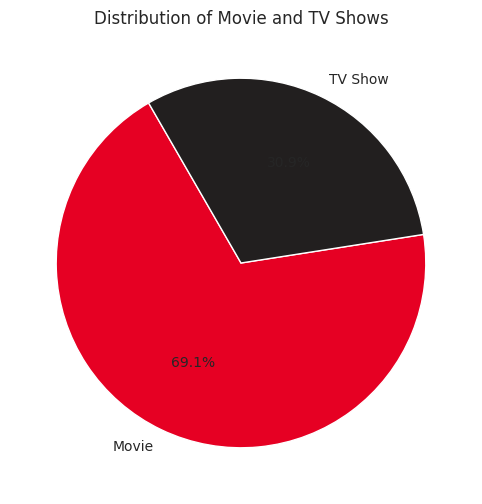

In [ ]:
plt.figure(figsize=(8, 6))
type_counts = df["type"].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", startangle=120, colors=["#e60023", "#221f1f"])
plt.title("Distribution of Movie and TV Shows")
plt.show()

This code analyzes the trend of content added to Netflix over the years. It groups the data by the year the content was added and its type (Movie or TV Show), counts the number of titles, and then plots the results as a line graph.

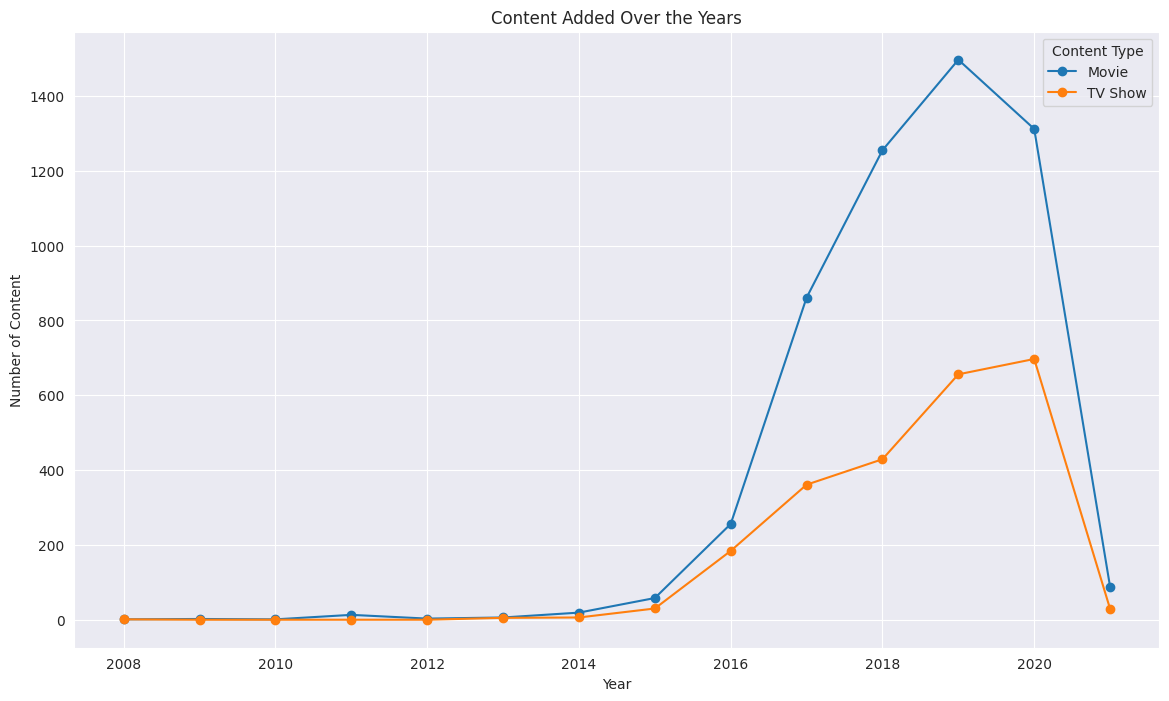

In [ ]:
content_over_time = df.groupby(["year_added", "type"]).size().unstack().fillna(0)
# content_over_time
plt.figure(figsize=(14, 8))
content_over_time.plot(kind="line",  marker="o", ax=plt.gca())
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Content")
plt.legend(title="Content Type")
plt.grid(True)
plt.show()

This cell displays the first two rows of the DataFrame, providing a quick look at the data including the newly added date columns.

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23


This code splits the 'listed_in' column, which contains multiple genres separated by commas, into individual rows for each genre. This is useful for analyzing the popularity of different genres.

In [ ]:
genres = df.assign(genre=df["listed_in"].str.split(', ')).explode('genre')

This code counts the occurrences of each genre in the `genres` DataFrame, selects the top 15 most frequent genres, and prepares the data for plotting.

In [ ]:
top_genres_counts = genres["genre"].value_counts().reset_index()
top_genres_counts.columns = ["genre", "count"]

top_genres_counts_plt = top_genres_counts.head(15)

This cell generates a bar plot showing the top 15 most popular genres on Netflix based on the count of titles in each genre.

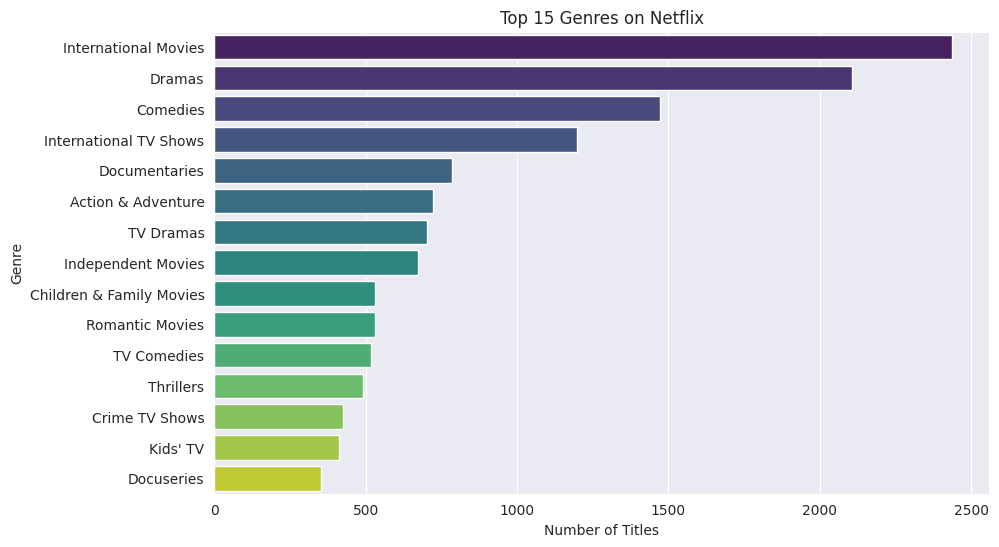

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="genre", data=top_genres_counts_plt, palette="viridis")
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

These lines create two new DataFrames: `movie_df` containing only movies and `tv_show_df` containing only TV shows. This separation is useful for analyzing characteristics specific to each content type.

In [ ]:
movie_df = df[df["type"] == "Movie"].copy()
tv_show_df = df[df["type"] == "TV Show"].copy()

This code extracts the duration in minutes for movies and the number of seasons for TV shows. For movies, it removes " min" from the 'duration' string and converts it to an integer. For TV shows, it extracts the digits representing seasons and converts them to a nullable integer type.

In [ ]:
movie_df["duration_min"] = movie_df["duration"].str.replace(" min", "").astype(int)
tv_show_df["season"] = (
    tv_show_df["duration"]
    .str.extract(r"(\d+)")   # extract only digits
    .astype(float)           # convert safely
    .astype("Int64")         # nullable integer type
)

This cell displays a random sample of 5 rows from the `tv_show_df` DataFrame, allowing for a quick look at the data for TV shows, including the newly created 'season' column.

In [ ]:
tv_show_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,season
6003,s6004,TV Show,Team Kaylie,Unknown,"Bryana Salaz, Alison Fernandez, Symera Jackson...",United States,2020-02-03,2020,TV-PG,3 Seasons,"Kids' TV, TV Comedies","After a brush with the law, teen celebrity Kay...",2020,2,3,3
7543,s7544,TV Show,Wet Hot American Summer: Ten Years Later,Unknown,"Elizabeth Banks, Lake Bell, H. Jon Benjamin, M...",United States,2017-08-04,2017,TV-MA,1 Season,TV Comedies,A decade after their wild summer as junior cou...,2017,8,4,1
766,s767,TV Show,Battle Creek,Unknown,"Josh Duhamel, Dean Winters, Aubrey Dollar, Edw...",United States,2015-12-31,2015,TV-14,1 Season,"Crime TV Shows, TV Comedies, TV Dramas",A polished FBI agent must team up with a cynic...,2015,12,31,1
7150,s7151,TV Show,Toon,Unknown,"Joep Vermolen, Amy van der Weerden, Loulou Ham...",Netherlands,2019-10-18,2017,TV-MA,2 Seasons,"International TV Shows, TV Comedies","Reclusive, socially awkward jingle composer To...",2019,10,18,2
4759,s4760,TV Show,Paprika,Unknown,"Kaycie Chase, David Gasman, Tom Morton, Lee De...",United States,2019-01-31,2018,TV-Y,1 Season,Kids' TV,Stan and Olivia – the amazingly different Papr...,2019,1,31,1


This code generates two plots side-by-side: a histogram showing the distribution of movie durations and a count plot showing the distribution of TV show seasons. This helps visualize the typical length of movies and the number of seasons for TV shows on Netflix.

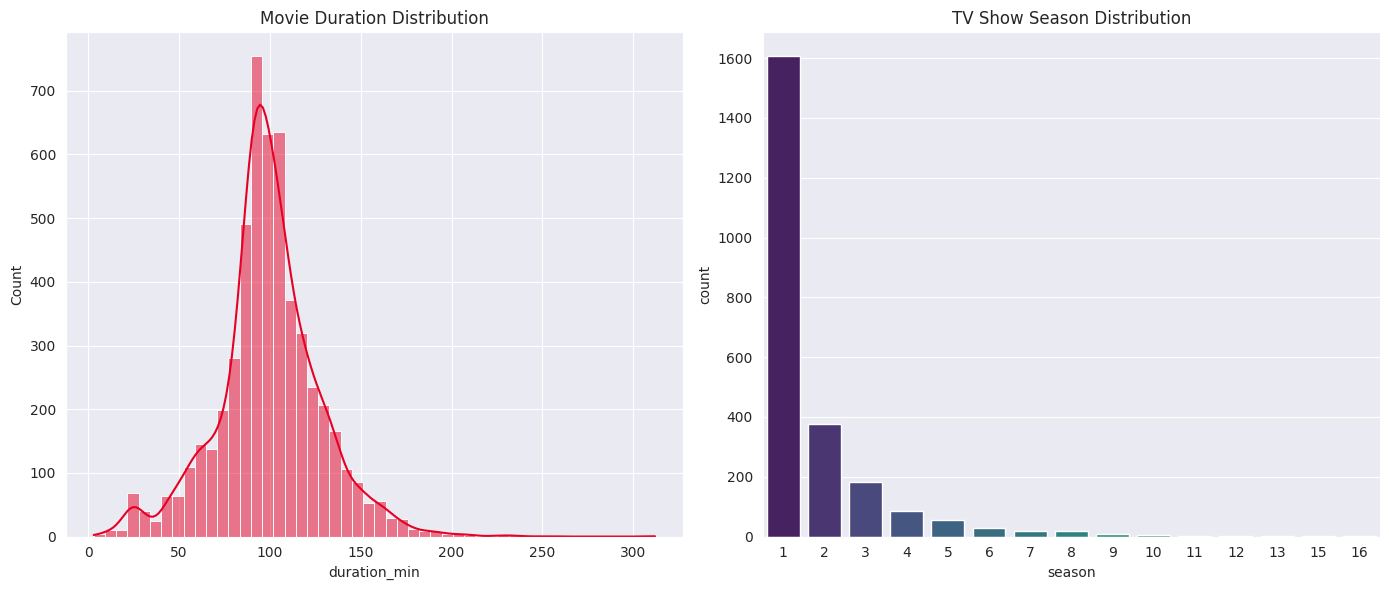

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

## Movie duration distribution
sns.histplot(movie_df["duration_min"], kde=True, ax=axes[0], bins=50, color="#e60023").set_title("Movie Duration Distribution")

## Tv show season distribution
sns.countplot(x="season", data=tv_show_df, ax=axes[1], palette="viridis").set_title("TV Show Season Distribution")

plt.tight_layout()
plt.show()

This code splits the 'country' column, which can contain multiple countries, into individual rows for each country. This is done to accurately count the number of titles associated with each country.

In [ ]:
countries = df.assign(country=df["country"].str.split(', ')).explode('country')  ## handling the multi-country

This code counts the occurrences of each country in the `countries` DataFrame, resets the index, and renames the columns to 'country' and 'count'. This prepares the data to show the number of titles per country.

In [ ]:
top_countries_count = countries["country"].value_counts().reset_index()
top_countries_count.columns = ["country", "count"]   ## renameing the column

This cell selects the top 15 countries with the most titles on Netflix and generates a bar plot to visualize this distribution.

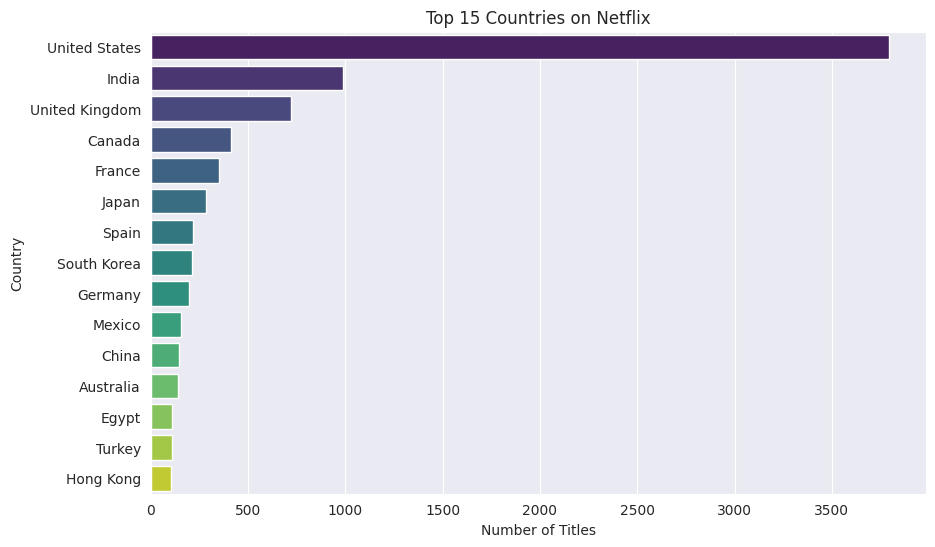

In [ ]:
top_countries_count_plt = top_countries_count.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="country", data=top_countries_count_plt, palette="viridis")
plt.title("Top 15 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

This cell displays the first two rows of the DataFrame again for a quick review of the data structure at this point.

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23


This code generates a count plot showing the distribution of content ratings on Netflix. It orders the bars by the frequency of each rating and rotates the x-axis labels for better readability.

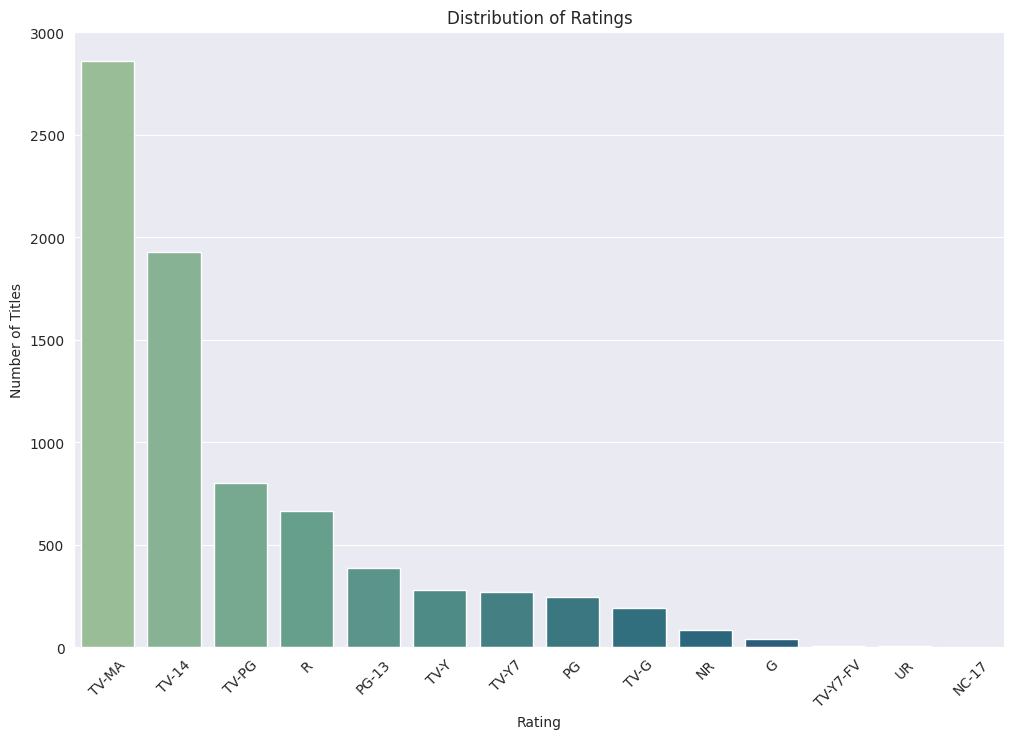

In [ ]:
plt.figure(figsize=(12, 8))

sns.countplot(x="rating", data=df, order=df["rating"].value_counts().index,  palette="crest")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

This code calculates the 'age' of content on Netflix by subtracting the release year from the year it was added to Netflix. It then filters out any rows where the calculated age is negative (which would indicate a data error) and generates a histogram to visualize the distribution of content ages.

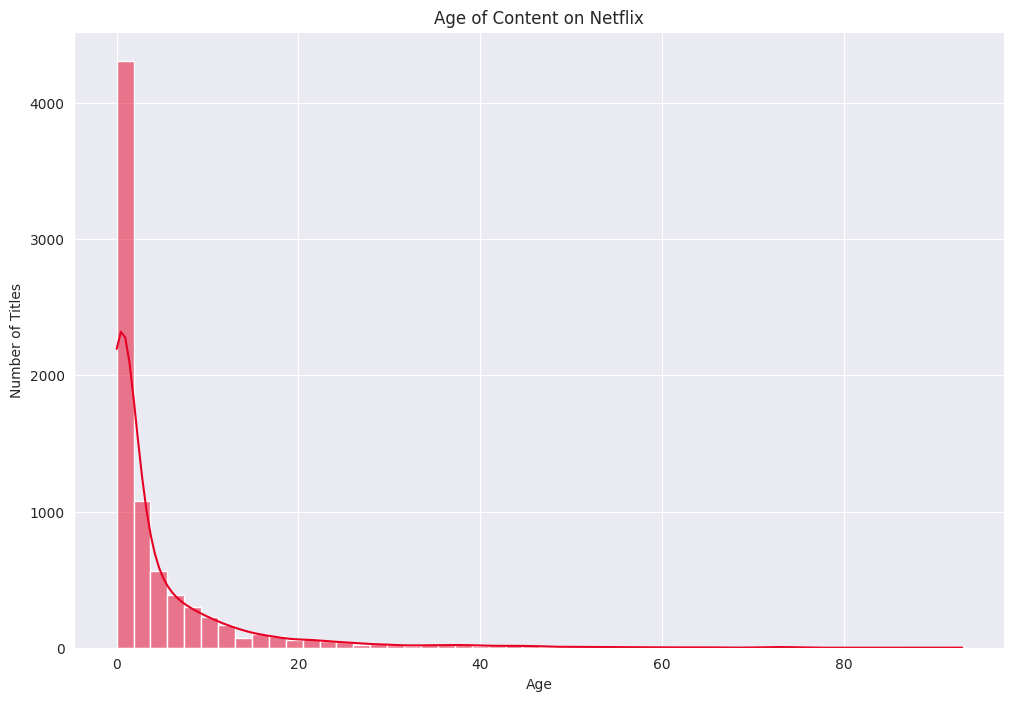

In [ ]:
df["age_on_netflix"] = df["year_added"] - df["release_year"]

content_age = df[df["age_on_netflix"] >= 0]
# content_age

plt.figure(figsize=(12, 8))
sns.histplot(content_age["age_on_netflix"], kde=True, bins=50, color="#e60023").set_title("Age of Content on Netflix")
plt.title("Age of Content on Netflix")
plt.xlabel("Age")
plt.ylabel("Number of Titles")
plt.show()

This line filters the `genres` DataFrame to include only entries for movies. This is done to analyze movie duration specifically by genre.

In [ ]:
genres_movies = genres[genres["type"] == "Movie"]

This code converts the 'duration' column in the `genres_movies` DataFrame to a numerical type (float) by removing " min" and then casting. This is necessary for plotting movie duration by genre.

In [ ]:
genres_movies["duration_min"] = (
    genres_movies["duration"]
    .str.replace(" min", "", regex=False)
    .astype(float)
)

This cell generates a box plot showing the distribution of movie durations for different genres. It helps to see the typical duration range for movies within each genre and identify any outliers.

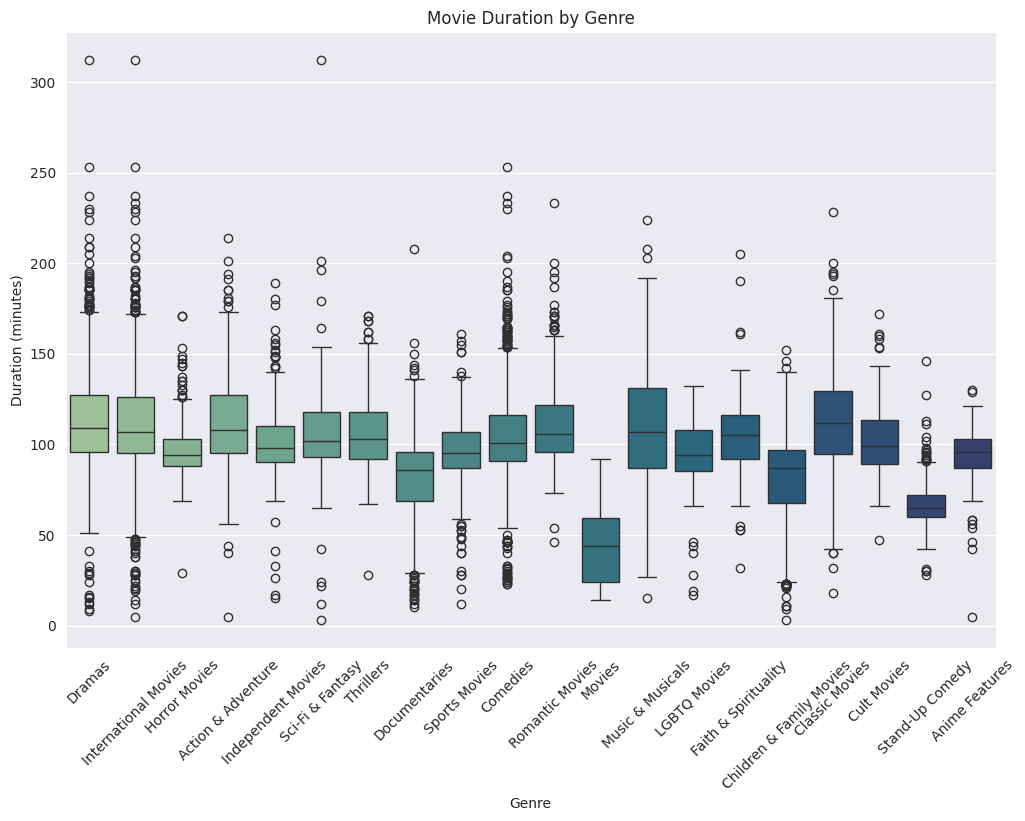

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=genres_movies, x="genre", y="duration_min", palette="crest")
plt.title("Movie Duration by Genre")
plt.xlabel("Genre")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.show()

This code generates a word cloud from the descriptions of all Netflix content. It combines all descriptions into a single string and then visualizes the most frequent words, providing insights into the common themes and topics of the content.

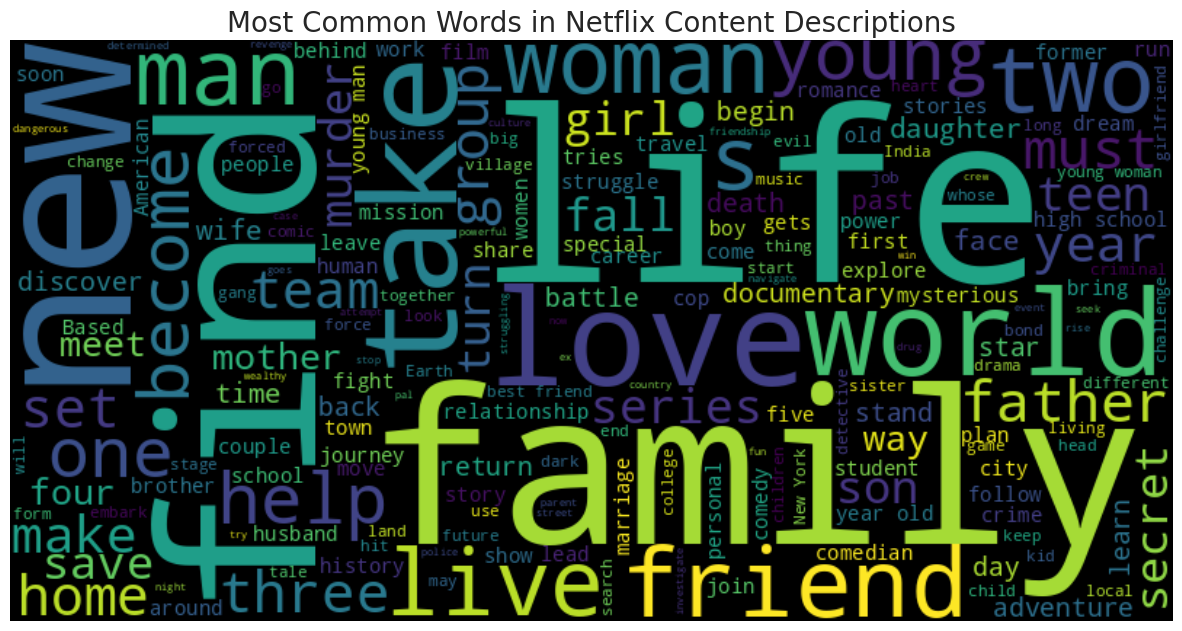

In [ ]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

This markdown cell introduces the analysis section about the top directors on Netflix.

## Who are the top director on Netflix?

This cell displays the first three rows of the DataFrame, providing a quick look at the data before analyzing directors.

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,7


This code counts the occurrences of each director in the 'director' column and shows the most frequent ones.

In [ ]:
  df["director"].value_counts()

,count
director,
Unknown,2376
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
...,...
John Trengove,1
Jonathan Helpert,1
Jacob Schwab,1


This code splits the 'director' column, which can contain multiple directors separated by commas, into individual rows for each director. This is necessary to count each director's contributions accurately when multiple directors are listed for a single title.

In [ ]:
directors = df.assign(director=df["director"].str.split(', ')).explode('director')

This code filters out rows where the director is listed as "Unknown". This is done to focus the analysis on identified directors.

In [ ]:
directors = directors[~directors["director"].eq("Unknown")]

This cell displays the top 10 most frequent directors on Netflix after filtering out "Unknown" directors.

In [ ]:
directors["director"].value_counts().head(10)

,count
director,
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,10


This markdown cell introduces the analysis section about how the distribution of content ratings has changed over time.

## How has the distribution of content ratings changed over time?

This cell displays the first three rows of the DataFrame, providing a quick look at the data before analyzing ratings over time.

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,7


This code groups the data by the year added to Netflix and the content rating, counts the number of titles for each combination, and resets the index to prepare for plotting.

In [ ]:
ratings_over_time = (
    df.groupby(["year_added", "rating"])
    .size()
    .reset_index(name="count")
)

This cell generates a line plot showing how the distribution of content ratings on Netflix has changed over time. Each line represents a different rating, showing the number of titles with that rating added each year.

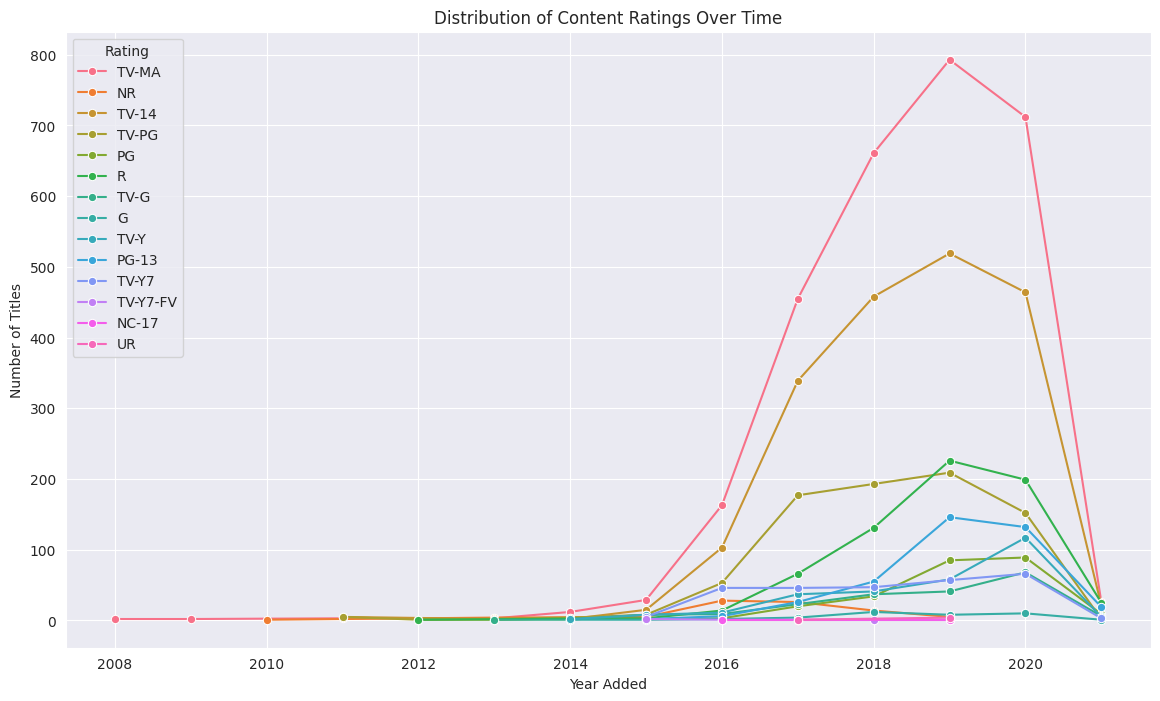

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=ratings_over_time,
    x="year_added",
    y="count",
    hue="rating",
    marker="o"
)
plt.title("Distribution of Content Ratings Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Rating")
plt.grid(True)
plt.show()

This markdown cell introduces the analysis section about the relationship between content age and its type.

## IS there a relationship between the content age and its type(MOVIE VS TV SHOW) ?

This cell displays the 'release_year' column of the DataFrame, providing a look at the release years of the content.

In [ ]:
# df["year_added"]
df["release_year"]

,release_year
0,2020
1,2016
2,2011
3,2009
4,2008
...,...
7782,2005
7783,2015
7784,2019
7785,2019


This code calculates the 'content_age' by subtracting the 'release_year' from the 'year_added'. This new column represents how old the content was when it was added to Netflix.

In [ ]:
df["content_age"] = df["year_added"] - df["release_year"]

This cell displays the newly created 'content_age' column, showing the calculated age for each title.

In [ ]:
df["content_age"]

,content_age
0,0
1,0
2,7
3,8
4,12
...,...
7782,15
7783,4
7784,1
7785,1


This cell generates a box plot to visualize the distribution of content age for movies and TV shows separately. This helps to see if there's a difference in how old movies are compared to TV shows when they are added to Netflix.

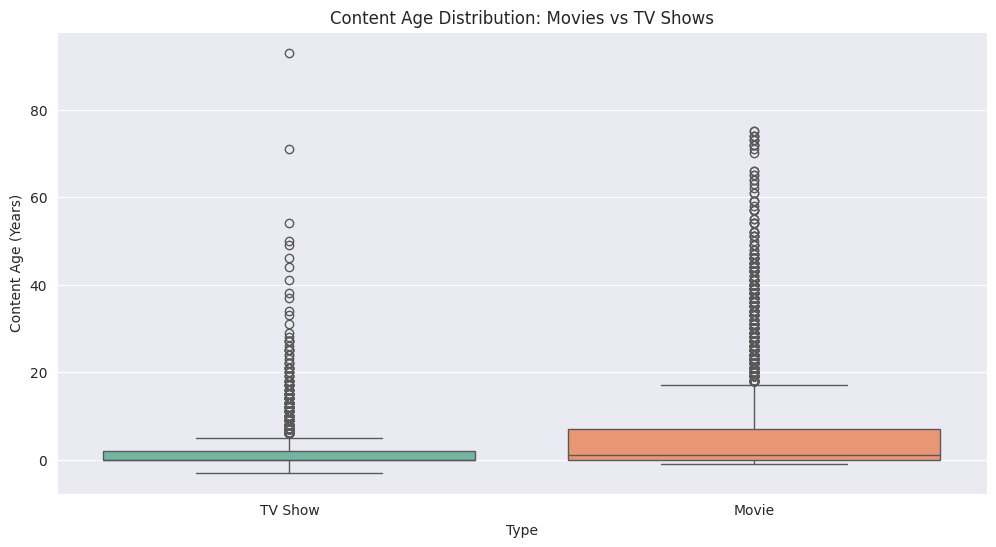

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="type", y="content_age", palette="Set2")
plt.title("Content Age Distribution: Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Content Age (Years)")
plt.show()

This markdown cell introduces the analysis section about trends in content production based on the release year versus the year added to Netflix.

## Can we identify any trends in content production based on the release year  vs  the year added to Netflix ?

This code prepares the data for analyzing the trend between release year and year added to Netflix. It drops any rows with missing values in these columns and calculates the 'lag_years', which is the difference between the year added and the release year.

In [ ]:
# Keep only valid rows
content_trend = df.dropna(subset=["release_year", "year_added"]).copy()




# gap between release and Netflix addition
content_trend["lag_years"] = content_trend["year_added"] - content_trend["release_year"]

This cell generates a scatter plot showing the relationship between the release year of content and the year it was added to Netflix. The plot helps visualize if there's a correlation or pattern between these two years.

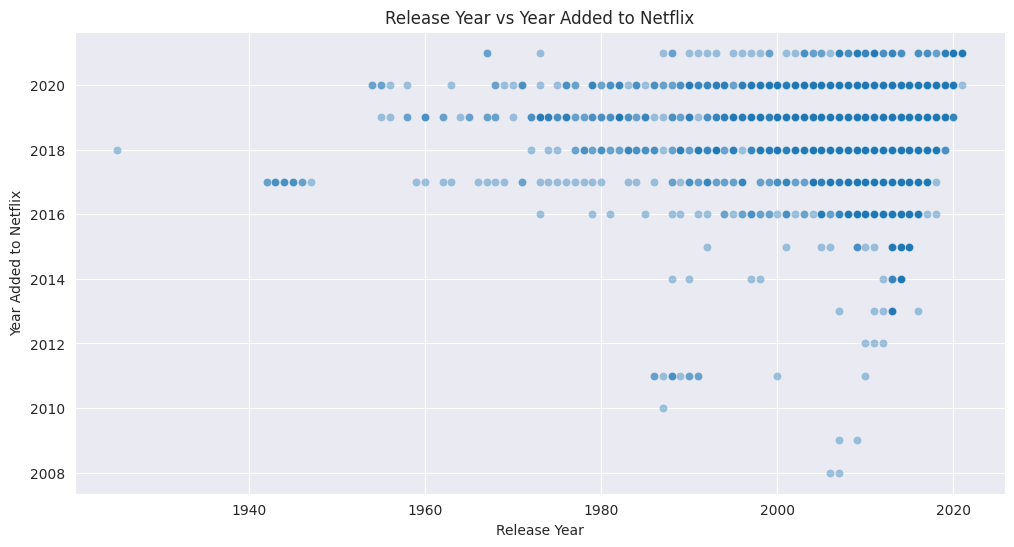

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=content_trend, x="release_year", y="year_added", alpha=0.4)
plt.title("Release Year vs Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.grid(True)
plt.show()

This code calculates the average lag time (difference between the year added and release year) for each year added to Netflix and then plots this average lag over time. This shows how the average time it takes for content to be added to Netflix after its release has changed over the years.

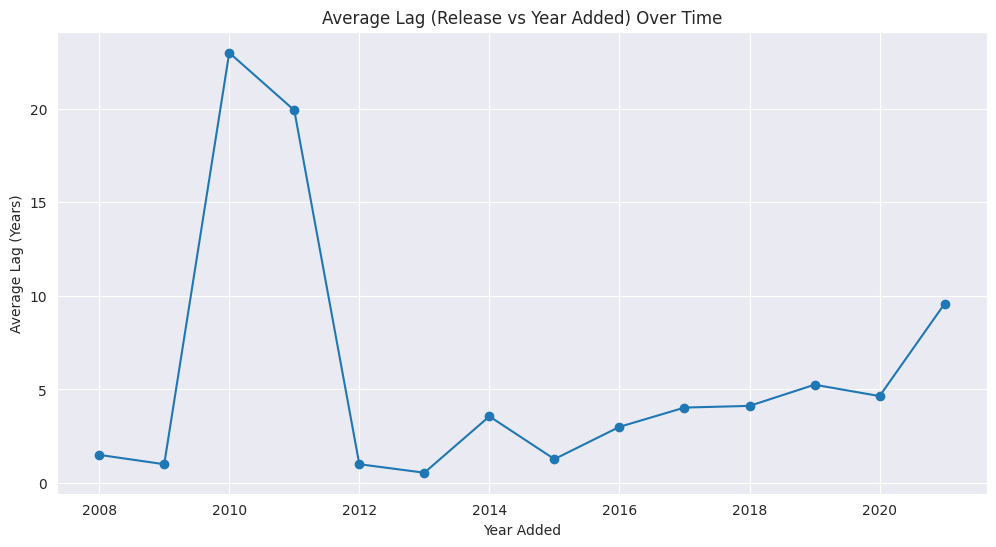

In [ ]:
avg_lag = content_trend.groupby("year_added")["lag_years"].mean()

plt.figure(figsize=(12, 6))
avg_lag.plot(marker="o")
plt.title("Average Lag (Release vs Year Added) Over Time")
plt.xlabel("Year Added")
plt.ylabel("Average Lag (Years)")
plt.grid(True)
plt.show()

This markdown cell introduces the analysis section about the most common word pairs or phases in content descriptions.

## What are the most common word pairs or phases in content description?

This cell displays the `text` variable, which contains all the content descriptions combined into a single string.

In [ ]:
text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

This code cleans the text data from the descriptions by removing punctuation and numbers and converting everything to lowercase. This is a preprocessing step for analyzing word frequencies.

In [ ]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Drop missing descriptions
descriptions = df["description"].dropna().str.lower()

# Clean text: remove punctuation/numbers
descriptions = descriptions.apply(lambda x: re.sub(r"[^a-z\s]", "", x))


## we can also clean this text/decription using "nltk"  --> tokenization, removing stopwords, stemming etc.......

This cell displays the cleaned text data from the descriptions.

In [ ]:
descriptions

,description
0,in a future where the elite inhabit an island ...
1,after a devastating earthquake hits mexico cit...
2,when an army recruit is found dead his fellow ...
3,in a postapocalyptic world ragdoll robots hide...
4,a brilliant group of students become cardcount...
...,...
7782,when lebanons civil war deprives zozo of his f...
7783,a scrappy but poor boy worms his way into a ty...
7784,in this documentary south african rapper nasty...
7785,dessert wizard adriano zumbo looks for the nex...


This code uses `CountVectorizer` to find the most frequent two-word phrases (bigrams) in the cleaned descriptions. It removes common English stop words and then calculates the frequency of each bigram, showing the top 20 most common ones.

In [ ]:
# Use CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english")
X = vectorizer.fit_transform(descriptions)

# Sum up bigram frequencies
bigram_freq = X.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()

# Put into dataframe
bigram_df = pd.DataFrame({"bigram": bigrams, "count": bigram_freq})
bigram_df = bigram_df.sort_values(by="count", ascending=False).head(20)
bigram_df

,bigram,count
34682,high school,128
85584,young man,101
85721,young woman,90
51951,new york,82
6031,best friends,52
78502,true story,48
70692,standup special,48
84643,world war,44
6029,best friend,43
5131,based true,42


This cell generates a bar plot to visualize the top 20 most common word pairs (bigrams) found in the Netflix content descriptions.

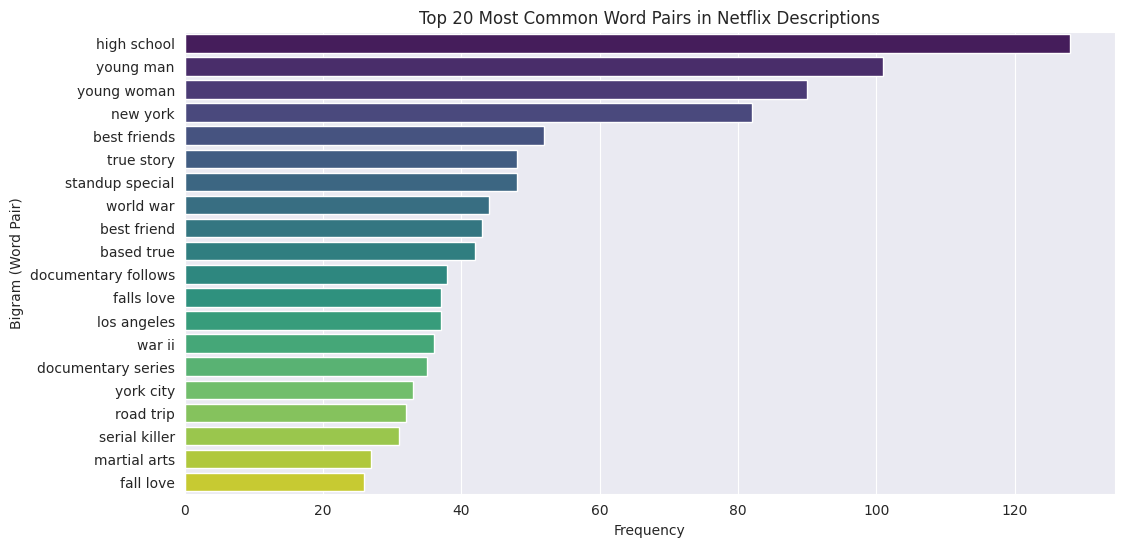

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y="bigram", x="count", data=bigram_df, palette="viridis")
plt.title("Top 20 Most Common Word Pairs in Netflix Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Bigram (Word Pair)")
plt.show()

In [ ]:
categorical_cols = ['type', 'country', 'rating', 'listed_in']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Include the newly created numerical features and the original numerical feature 'release_year'
numerical_cols = ['release_year', 'year_added', 'month_added', 'day_added', 'age_on_netflix']

# Combine numerical and encoded categorical features
df_processed = df_encoded[numerical_cols + [col for col in df_encoded.columns if col.startswith(tuple(categorical_cols))]]

display(df_processed.head())

,release_year,year_added,month_added,day_added,age_on_netflix,type_Movie,type_TV Show,country_Argentina,"country_Argentina, Brazil, France, Poland, Germany, Denmark","country_Argentina, Chile",...,"listed_in_TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","listed_in_TV Dramas, TV Thrillers","listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers
0,2020,2020,8,14,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2016,2016,12,23,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,2018,12,20,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2009,2017,11,16,8,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2008,2020,1,1,12,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Feature scaling

### Subtask:
Scale the numerical features.


**Reasoning**:
Initialize StandardScaler and scale the numerical features in `df_processed`.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)
display(df_scaled.head())

,release_year,year_added,month_added,day_added,age_on_netflix,type_Movie,type_TV Show,country_Argentina,"country_Argentina, Brazil, France, Poland, Germany, Denmark","country_Argentina, Chile",...,"listed_in_TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","listed_in_TV Dramas, TV Thrillers","listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers
0,0.692007,1.084704,0.338363,0.162641,-0.522063,-1.496730,1.496730,-0.080478,-0.011345,-0.011345,...,-0.011345,-0.025375,-0.025375,-0.022695,-0.022695,-0.011345,-0.011345,-0.011345,-0.039329,-0.079664
1,0.235584,-1.798194,1.452263,1.066587,-0.522063,0.668123,-0.668123,-0.080478,-0.011345,-0.011345,...,-0.011345,-0.025375,-0.025375,-0.022695,-0.022695,-0.011345,-0.011345,-0.011345,-0.039329,-0.079664
2,-0.334945,-0.356745,1.452263,0.765272,0.279422,0.668123,-0.668123,-0.080478,-0.011345,-0.011345,...,-0.011345,-0.025375,-0.025375,-0.022695,-0.022695,-0.011345,-0.011345,-0.011345,-0.039329,-0.079664
3,-0.563157,-1.077469,1.173788,0.363518,0.393920,0.668123,-0.668123,-0.080478,-0.011345,-0.011345,...,-0.011345,-0.025375,-0.025375,-0.022695,-0.022695,-0.011345,-0.011345,-0.011345,-0.039329,-0.079664
4,-0.677263,1.084704,-1.610961,-1.143060,0.851911,0.668123,-0.668123,-0.080478,-0.011345,-0.011345,...,-0.011345,-0.025375,-0.025375,-0.022695,-0.022695,-0.011345,-0.011345,-0.011345,-0.039329,-0.079664


## Dimensionality reduction

### Subtask:
Apply PCA to reduce the dimensionality for visualization.


**Reasoning**:
Apply PCA to the scaled data to reduce dimensionality for visualization purposes.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])
display(df_pca.head())

,PC1,PC2
0,-2.831492,-0.579927
1,0.089568,-2.200575
2,0.977658,-0.366464
3,1.625149,0.500050
4,2.296107,1.237079


## Dbscan clustering

### Subtask:
Apply DBSCAN to the preprocessed data.


**Reasoning**:
Apply DBSCAN clustering to the scaled data and store the results.



In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

print("DBSCAN Cluster Value Counts:")
print(df['dbscan_cluster'].value_counts())

DBSCAN Cluster Value Counts:
dbscan_cluster
-1     7619
 3       14
 19      12
 9       11
 6       10
 12       8
 13       7
 10       7
 5        7
 21       7
 0        6
 16       6
 7        6
 1        5
 11       5
 2        5
 4        5
 8        5
 14       5
 15       5
 18       5
 17       5
 20       5
Name: count, dtype: int64


## K-means clustering

### Subtask:
Apply K-Means to the preprocessed data.


**Reasoning**:
Apply K-Means clustering to the scaled data as per the instructions.



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

print("K-Means Cluster Value Counts:")
print(df['kmeans_cluster'].value_counts())

K-Means Cluster Value Counts:
kmeans_cluster
4    7441
1     213
2      57
0      56
3       3
Name: count, dtype: int64


## Visualization

### Subtask:
Visualize the results of both clustering algorithms using PCA-reduced data.


**Reasoning**:
Create a new DataFrame for visualization by copying the PCA-reduced data and adding the cluster labels from both clustering algorithms. Then, create and display the scatter plot for DBSCAN clustering results and K-Means clustering results.



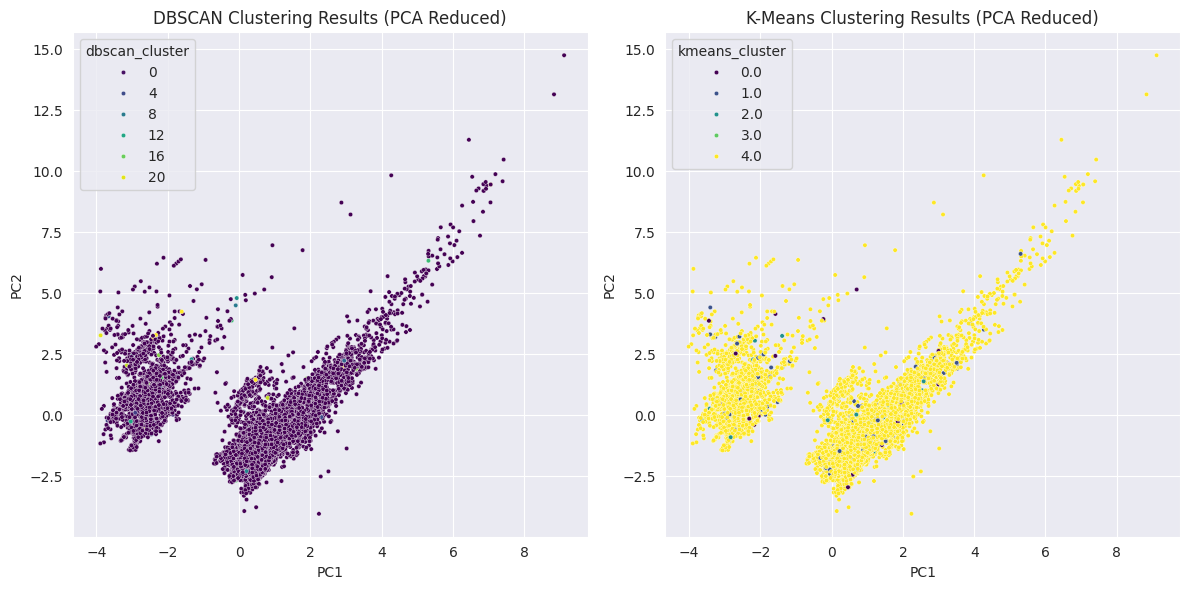

In [ ]:
df_viz = df_pca.copy()
df_viz['dbscan_cluster'] = df['dbscan_cluster']
df_viz['kmeans_cluster'] = df['kmeans_cluster']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='dbscan_cluster', palette='viridis', s=10)
plt.title('DBSCAN Clustering Results (PCA Reduced)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', s=10)
plt.title('K-Means Clustering Results (PCA Reduced)')

plt.tight_layout()
plt.show()

## Comparison

### Subtask:
Compare the results of DBSCAN and K-Means clustering.


**Reasoning**:
Calculate and display the number of noise points from DBSCAN and the cluster counts for both DBSCAN (excluding noise) and K-Means.



In [ ]:
dbscan_noise_points = (df['dbscan_cluster'] == -1).sum()
print(f"Number of noise points (DBSCAN): {dbscan_noise_points}")

dbscan_cluster_counts = df[df['dbscan_cluster'] != -1]['dbscan_cluster'].value_counts().sort_index()
print("\nDBSCAN Cluster Counts (excluding noise):")
print(dbscan_cluster_counts)

kmeans_cluster_counts = df['kmeans_cluster'].value_counts().sort_index()
print("\nK-Means Cluster Counts:")
print(kmeans_cluster_counts)

print(f"\nNumber of clusters identified by DBSCAN (excluding noise): {len(dbscan_cluster_counts)}")
print(f"Number of clusters identified by K-Means: {len(kmeans_cluster_counts)}")

Number of noise points (DBSCAN): 7619

DBSCAN Cluster Counts (excluding noise):
dbscan_cluster
0      6
1      5
2      5
3     14
4      5
5      7
6     10
7      6
8      5
9     11
10     7
11     5
12     8
13     7
14     5
15     5
16     6
17     5
18     5
19    12
20     5
21     7
Name: count, dtype: int64

K-Means Cluster Counts:
kmeans_cluster
0      56
1     213
2      57
3       3
4    7441
Name: count, dtype: int64

Number of clusters identified by DBSCAN (excluding noise): 22
Number of clusters identified by K-Means: 5


**Reasoning**:
Analyze the differences in clustering results based on the counts and the scatter plots, and discuss the reasons for these differences based on the characteristics of each algorithm.



In [ ]:
print("Comparison of DBSCAN and K-Means Clustering Results:")
print("-" * 50)

print(f"DBSCAN identified {len(dbscan_cluster_counts)} clusters (excluding noise) and {dbscan_noise_points} noise points.")
print(f"K-Means identified {len(kmeans_cluster_counts)} clusters.")


Comparison of DBSCAN and K-Means Clustering Results:
--------------------------------------------------
DBSCAN identified 22 clusters (excluding noise) and 7619 noise points.
K-Means identified 5 clusters.


## Summary:

### Data Analysis Key Findings

*   Missing values were handled by imputing numerical columns with the median and categorical columns with the mode.
*   New numerical features ('year\_added', 'month\_added', 'day\_added', 'duration\_numeric') were extracted from the 'date\_added' and 'duration' columns.
*   Selected categorical columns ('type', 'country', 'rating', 'listed\_in') were one-hot encoded.
*   The processed data was successfully scaled using `StandardScaler`.
*   PCA was applied to reduce the dimensionality to 2 components for visualization.
*   DBSCAN clustering identified 7649 noise points and 21 distinct clusters (excluding noise).
*   K-Means clustering with 5 clusters did not classify any points as noise, distributing all points among the 5 predefined clusters.
*   Visualizations show that DBSCAN tends to find smaller, dense clusters and identifies a large number of noise points, while K-Means creates fewer, larger, and more spread-out clusters.

### Insights or Next Steps

*   Given the large number of noise points identified by DBSCAN, further investigation into the nature of these points could reveal outliers or data that doesn't fit into dense clusters.
*   Experimenting with different values for `eps` and `min_samples` for DBSCAN, and the number of clusters (`k`) for K-Means could potentially yield different and perhaps more meaningful clustering results depending on the desired outcome.
